In [1]:
!pip --disable-pip-version-check --quiet install --upgrade "pydocumentdb~=2.0.1" "folium~=0.2.1"

In [2]:
from pydocumentdb import document_client

In [3]:
HOST="https://cosmosdbpgf.documents.azure.com:443/"
READ_ONLY_KEY = "KGxWcURYUkrSu3pJ9ldK7N3XfiD4Hal2HHD8btAlFCuRIM9sh5N7yxzCwpbGtLzMgKHZzIqyB8k1iKJISH8qlg=="

In [4]:
document_client

<module 'pydocumentdb.document_client' from 'C:\\Users\\peter\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\pydocumentdb\\document_client.py'>

In [5]:
client = document_client.DocumentClient(HOST, {'masterKey': READ_ONLY_KEY})

In [6]:
list(db["id"] for db in client.ReadDatabases())

INFO:Starting new HTTPS connection (1): cosmosdbpgf.documents.azure.com
INFO:Starting new HTTPS connection (1): cosmosdbpgf-southafricanorth.documents.azure.com


['Climate']

In [7]:
DB_ID = "Climate"
db = next(db for db in client.ReadDatabases() if db["id"] == DB_ID)

list(coll["id"] for coll in client.ReadCollections(db["_self"]))

['Recordings']

In [10]:
COLLECTION_ID = "Recordings"
climate_collection = next(coll for coll in client.ReadCollections(db["_self"]) if coll["id"] == COLLECTION_ID)

next(iter(client.ReadDocuments(climate_collection["_self"])))


{'month': '2020-03',
 'timestamp': 1583683958,
 'temperature': 26.299999237060547,
 'humidity': 48.20000076293945,
 'id': '9809625f-0817-442e-82c3-5e5cad353978',
 '_rid': '7VlRAPQKHGEBAAAAAAAAAA==',
 '_self': 'dbs/7VlRAA==/colls/7VlRAPQKHGE=/docs/7VlRAPQKHGEBAAAAAAAAAA==/',
 '_etag': '"24009b60-0000-3000-0000-5e6519790000"',
 '_attachments': 'attachments/',
 '_ts': 1583683961}

In [11]:
climate_collection

{'id': 'Recordings',
 'indexingPolicy': {'indexingMode': 'consistent',
  'automatic': True,
  'includedPaths': [{'path': '/*'}],
  'excludedPaths': [{'path': '/"_etag"/?'}]},
 'partitionKey': {'paths': ['/timestamp'], 'kind': 'Hash'},
 'conflictResolutionPolicy': {'mode': 'LastWriterWins',
  'conflictResolutionPath': '/_ts',
  'conflictResolutionProcedure': ''},
 'geospatialConfig': {'type': 'Geography'},
 '_rid': '7VlRAPQKHGE=',
 '_ts': 1583682309,
 '_self': 'dbs/7VlRAA==/colls/7VlRAPQKHGE=/',
 '_etag': '"0000c401-0000-3000-0000-5e6513050000"',
 '_docs': 'docs/',
 '_sprocs': 'sprocs/',
 '_triggers': 'triggers/',
 '_udfs': 'udfs/',
 '_conflicts': 'conflicts/'}

In [12]:
def query_collection(collection, client=client):
    def exec_query(query):
        options = {} 
        options['enableCrossPartitionQuery'] = True
        options['maxItemCount'] = 200
        return iter(client.QueryDocuments(collection["_self"], query, options))
    return exec_query

query_temp = query_collection(climate_collection)

In [13]:
from datetime import datetime

In [14]:
from pprint import pprint
from datetime import datetime
import matplotlib.dates as dates
import pandas as pd

query = """
SELECT r.id,
    r.month,
    r.timestamp,
    r.temperature,
    r.humidity
FROM r
WHERE r.month = "2020-06"
"""

dflist = []
index = []
readings = query_temp(query)
for item in readings:
    item['timetext'] = str(datetime.fromtimestamp(item['timestamp']))
    item['time'] = datetime.fromtimestamp(item['timestamp'])
    dflist.append(dict(item))
    index.append(item['time'])
    pprint(item)

 'temperature': 16.5,
 'time': datetime.datetime(2020, 6, 30, 5, 35, 39),
 'timestamp': 1593488139,
 'timetext': '2020-06-30 05:35:39'}
{'humidity': 42.900001525878906,
 'id': 'c7fc7b92-2bd7-4486-a002-1bd6d45f392c',
 'month': '2020-06',
 'temperature': 16.5,
 'time': datetime.datetime(2020, 6, 30, 5, 50, 41),
 'timestamp': 1593489041,
 'timetext': '2020-06-30 05:50:41'}
{'humidity': 43.29999923706055,
 'id': '8bb58010-3707-4632-bf33-7ae1ac321f9a',
 'month': '2020-06',
 'temperature': 16.399999618530273,
 'time': datetime.datetime(2020, 6, 30, 6, 5, 42),
 'timestamp': 1593489942,
 'timetext': '2020-06-30 06:05:42'}
{'humidity': 42.29999923706055,
 'id': 'd8fa4c73-3da2-4a50-ba73-9b44285d12cd',
 'month': '2020-06',
 'temperature': 17.399999618530273,
 'time': datetime.datetime(2020, 6, 30, 6, 20, 50),
 'timestamp': 1593490850,
 'timetext': '2020-06-30 06:20:50'}
{'humidity': 42.29999923706055,
 'id': '0a72e45e-f632-4f35-b6b7-29fedbc47a54',
 'month': '2020-06',
 'temperature': 17.399999618

In [15]:
df = pd.DataFrame(dflist, index=index)
df.head()

,id,month,timestamp,temperature,humidity,timetext,time
2020-06-01 02:01:11,5de42f99-5cfa-41b0-981e-8cf23e39207a,2020-06,1590969671,19.200001,44.900002,2020-06-01 02:01:11,2020-06-01 02:01:11
2020-06-01 02:16:13,592d833b-b878-4f59-9eab-bae1a8345cc4,2020-06,1590970573,19.200001,44.799999,2020-06-01 02:16:13,2020-06-01 02:16:13
2020-06-01 02:31:15,c5cdae4f-7d25-4e3b-9c49-f95624fbbe2b,2020-06,1590971475,19.100000,44.799999,2020-06-01 02:31:15,2020-06-01 02:31:15
2020-06-01 02:46:19,62335aa7-0b9f-4893-a087-f32584e7d66d,2020-06,1590972379,19.000000,44.799999,2020-06-01 02:46:19,2020-06-01 02:46:19
2020-06-01 03:01:28,c842cc92-67be-4b3e-8e29-bbcb553d6f00,2020-06,1590973288,19.000000,44.700001,2020-06-01 03:01:28,2020-06-01 03:01:28


In [16]:
import matplotlib.pyplot as plt
import numpy as np

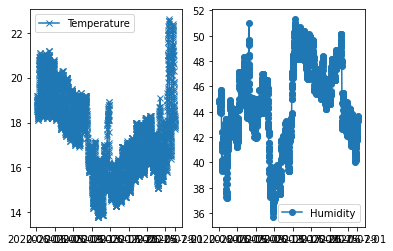

In [17]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, df['time'], df['temperature'], {'marker': 'x', 'label': 'Temperature'})
my_plotter(ax2, df['time'], df['humidity'], {'marker': 'o', 'label': 'Humidity'})
ax1.legend()
ax2.legend()


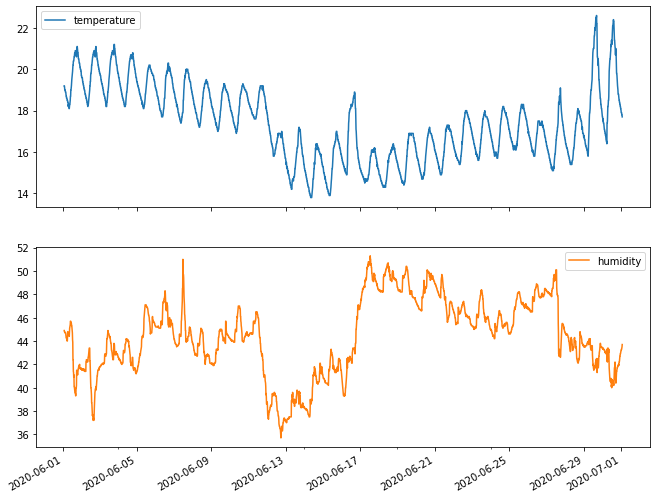

In [18]:
cols_plot = ['temperature', 'humidity']
axes = df[cols_plot].plot(figsize=(11,9), subplots=True)